In [66]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)


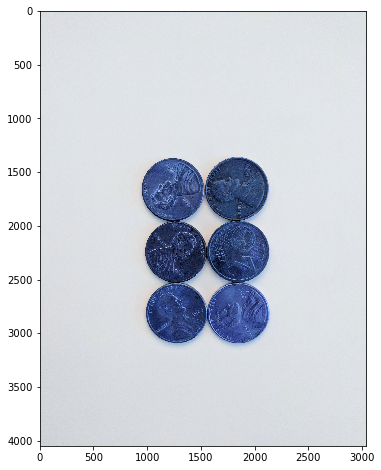

In [68]:
coin = cv2.imread('pennies.jpg')
img = cv2.imread('pennies.jpg')
display(coin)

In [69]:
"""
basic method for boundaries is 
    1: apply median blur
    2:convert to grayscale
    3:apply binary threshold
    4:find countors
"""

'\nbasic method for boundaries is \n    1: apply median blur\n    2:convert to grayscale\n    3:apply binary threshold\n    4:find countors\n'

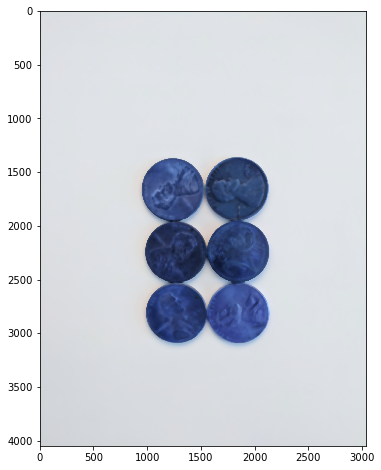

In [70]:
coin_blur = cv2.medianBlur(img,25)
display(coin_blur)

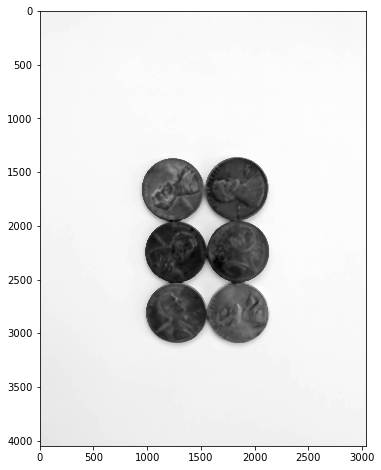

In [71]:
coin_blur_gray = cv2.cvtColor(coin_blur,cv2.COLOR_BGR2GRAY)
display(coin_blur_gray,'gray')

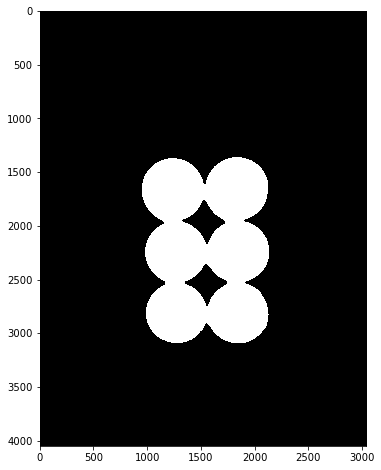

In [72]:
ret, coin_th = cv2.threshold(coin_blur_gray,160,255,cv2.THRESH_BINARY_INV)
display(coin_th,'gray')

In [73]:
image, contours, hierarchy = cv2.findContours(coin_th.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [74]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:        
        cv2.drawContours(coin, contours, i, (255, 0, 0), 10)

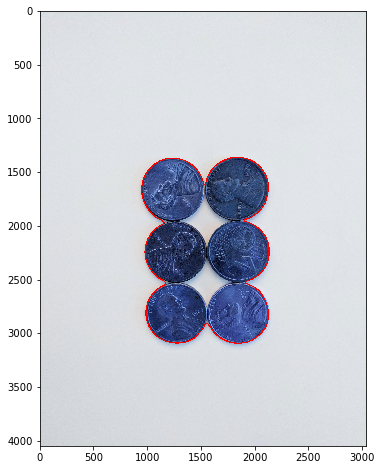

In [75]:
display(coin)

In [76]:
img = cv2.imread('pennies.jpg')

In [77]:
img_blur = cv2.medianBlur(img,35)

In [78]:
img_blur_gray = cv2.cvtColor(img_blur,cv2.COLOR_BGR2GRAY)

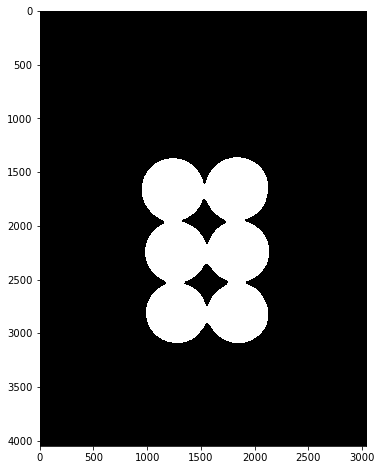

In [79]:
ret,thresh = cv2.threshold(img_blur_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh,'gray')

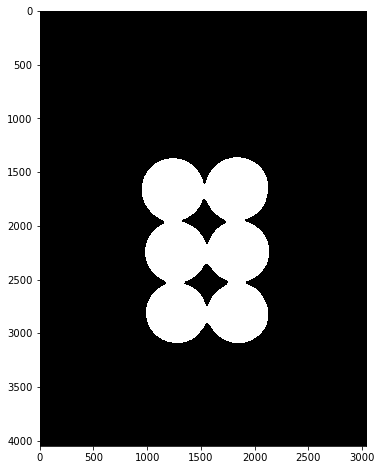

In [80]:
kernel = np.ones((3,3),np.uint8)
opened = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
display(opened,'gray')

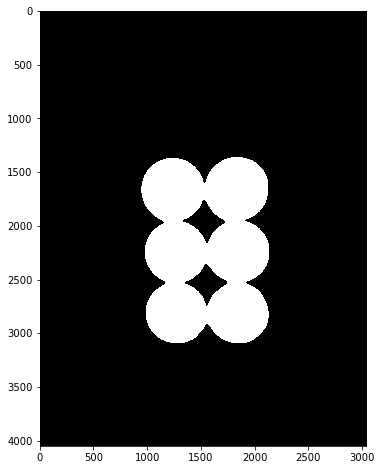

In [81]:
sure_bg = cv2.dilate(opened,kernel,iterations =3)
display(sure_bg,'gray')

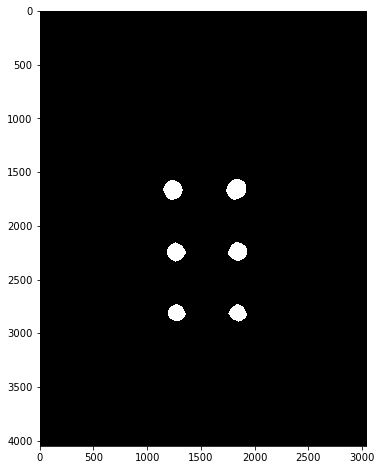

In [82]:
dist_transform = cv2.distanceTransform(opened,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
display(sure_fg,'gray')

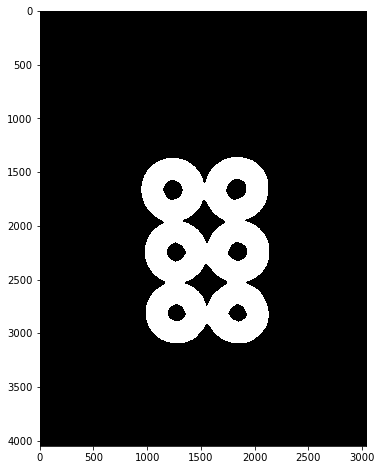

In [83]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
display(unknown,'gray')

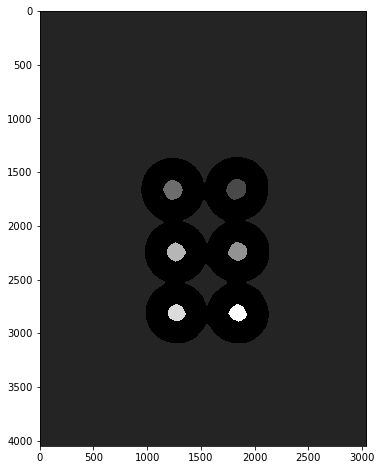

In [84]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers +1
markers[unknown==255]=0
display(markers,'gray')

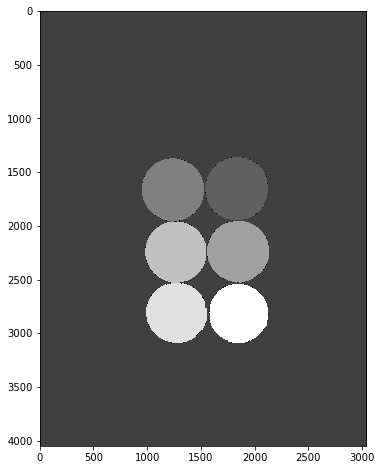

In [85]:
markers = cv2.watershed(img,markers)
display(markers,'gray')

In [86]:
image,contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(img,contours,i,(255,0,0),10)

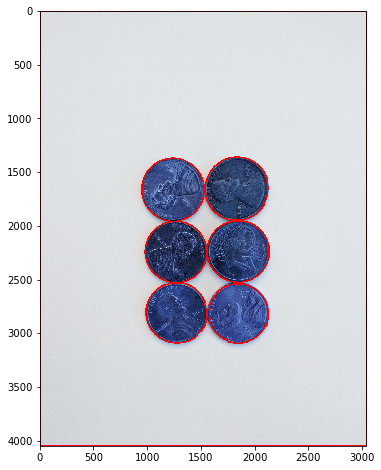

In [87]:
display(img)